## S&P 500 App Proof of Concept

#### Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_data():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    html = pd.read_html(url, header=0)
    df = html[0]
    return df

In [4]:
df = load_data()
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


### Examining the Sectors

In [5]:
sector_unique = df["GICS Sector"].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Discretionary',
       'Energy'], dtype=object)

In [6]:
len(sector_unique)

11

#### Group by Sector

In [7]:
grouped_sector = df.groupby("GICS Sector")

In [8]:
grouped_sector.first()

,Symbol,Security,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
GICS Sector,,,,,,,
Communication Services,ATVI,Activision Blizzard,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AMZN,Amazon,Broadline Retail,"Seattle, Washington",2005-11-18,1018724,1994
Consumer Staples,ADM,ADM,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902
Energy,APA,APA Corporation,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
Financials,AFL,Aflac,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
Industrials,MMM,3M,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
Information Technology,ACN,Accenture,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products and Chemicals,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [9]:
grouped_sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  23.0  1.131438e+06  500381.710118  29989.0  773272.50   
Consumer Discretionary  52.0  8.870308e+05  439652.445639  37996.0  783297.00   
Consumer Staples        38.0  4.708499e+05  620106.638889   7084.0   27947.75   
Energy                  23.0  8.423255e+05  640873.249366   4447.0   97594.00   
Financials              72.0  6.810251e+05  540006.059890   4962.0   73085.75   
Health Care             65.0  8.444450e+05  546653.710569   1800.0  313616.00   
Industrials             74.0  6.544831e+05  577419.498004   4281.0   76590.50   
Information Technology  67.0  9.155848e+05  511999.789800   2488.0  759324.00   
Materials               29.0  8.433121e+05  687449.351971   2969.0   73309.00   
Real Estate             30.0  9.530729e+05  379707.226998  34903.0  885852.50   
Utilities               30.0  8.457124e+05  460276.348204   4904.0  737178.50   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1166691.0  1564708.00  1754301.0  
Consumer Discretionary   918562.5  1133843.50  1590895.0  
Consumer Staples          78950.0   929235.25  1944048.0  
Energy                  1035002.0  1447738.50  1841666.0  
Financials               825514.0  1128969.25  1633917.0  
Health Care              885725.0  1110803.00  1932393.0  
Industrials              726033.0  1059631.25  1783180.0  
Information Technology   896878.0  1334503.00  1730168.0  
Materials                916076.0  1396009.00  1755672.0  
Real Estate             1027311.5  1069002.75  1705696.0  
Utilities                898492.5  1043948.50  1868275.0

#### Examine by Sector

In [10]:
# Let's have a look at the real estate sector

grouped_sector.get_group("Real Estate")

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
16,ARE,Alexandria Real Estate Equities,Real Estate,Office REITs,"Pasadena, California",2017-03-20,1035443,1994
32,AMT,American Tower,Real Estate,Telecom Tower REITs,"Boston, Massachusetts",2007-11-19,1053507,1995
53,AVB,AvalonBay Communities,Real Estate,Multi-Family Residential REITs,"Arlington, Virginia",2007-01-10,915912,1978
73,BXP,Boston Properties,Real Estate,Office REITs,"Boston, Massachusetts",2006-04-03,1037540,1970
84,CPT,Camden Property Trust,Real Estate,Multi-Family Residential REITs,"Houston, Texas",2022-04-04,906345,1981
94,CBRE,CBRE Group,Real Estate,Real Estate Services,"Dallas, Texas",2006-11-10,1138118,1906
135,CCI,Crown Castle,Real Estate,Telecom Tower REITs,"Houston, Texas",2012-03-14,1051470,1994
149,DLR,Digital Realty,Real Estate,Data Center REITs,"Austin, Texas",2016-05-18,1297996,2004
178,EQIX,Equinix,Real Estate,Data Center REITs,"Redwood City, California",2015-03-20,1101239,1998
179,EQR,Equity Residential,Real Estate,Multi-Family Residential REITs,"Chicago, Illinois",2001-12-03,906107,1969


### Finance Data

In [11]:
import yfinance as yf

##### List of S&P 500 Symbols

In [12]:
list(df["Symbol"])

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA

##### Retrieve Stock Data

In [13]:
data = yf.download(tickers=list(df["Symbol"]), 
                   period = "ytd", # Get all data from beginning of year to current date
                   interval="1d", 
                   group_by="ticker",
                   auto_adjust=True,
                   prepost=True,
                   threads=True,
                   proxy=None)

[*********************100%%**********************]  503 of 503 completed



2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=ytd)')
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')


In [14]:
data

UAL                                                   DXC  \
                 Open       High        Low      Close    Volume       Open   
Date                                                                          
2023-01-03  38.220001  38.250000  36.820000  37.209999   8149600  26.719999   
2023-01-04  37.619999  39.849998  37.560001  39.720001   8743700  28.049999   
2023-01-05  39.599998  41.270000  39.430000  41.240002   8292700  27.879999   
2023-01-06  41.410000  42.279999  41.049999  42.240002   7728200  27.879999   
2023-01-09  42.570000  44.189999  42.259998  43.349998  10072200  28.370001   
...               ...        ...        ...        ...       ...        ...   
2023-08-30  50.180000  50.580002  49.930000  50.099998   3075000  20.700001   
2023-08-31  50.520000  50.540001  49.480000  49.810001   4160000  20.639999   
2023-09-01  50.130001  50.160000  49.119999  49.720001   3266000  20.940001   
2023-09-05  48.980000  49.330002  47.380001  48.470001  12327600  20.900000   
2023-09-06  47.900002  49.709999  47.900002  48.340000   6622600  20.969999   

                                                      ...        FCX  \
                 High        Low      Close   Volume  ...       Open   
Date                                                  ...              
2023-01-03  27.750000  26.650000  27.670000  1934500  ...  37.547591   
2023-01-04  28.370001  27.639999  28.180000  1471200  ...  37.597060   
2023-01-05  28.129999  27.580000  27.660000  1743000  ...  38.487518   
2023-01-06  28.400000  27.590000  28.170000  1492300  ...  40.278325   
2023-01-09  28.750000  28.209999  28.270000  1552500  ...  42.741922   
...               ...        ...        ...      ...  ...        ...   
2023-08-30  20.820000  20.490000  20.520000  1818700  ...  40.090000   
2023-08-31  20.840000  20.540001  20.740000  2454100  ...  40.259998   
2023-09-01  21.160000  20.809999  21.110001  2084000  ...  40.919998   
2023-09-05  21.389999  20.850000  21.170000  2816300  ...  41.349998   
2023-09-06  21.280001  20.969999  21.020000  2287200  ...  40.130001   

                                                                J              \
                 High        Low      Close    Volume        Open        High   
Date                                                                            
2023-01-03  38.655713  37.191407  37.517906   8576100  119.730198  120.634306   
2023-01-04  38.734867  37.320030  38.586456  10415600  121.389392  125.403251   
2023-01-05  39.842990  38.250061  39.417549  12341000  124.399795  124.946240   
2023-01-06  42.148283  40.110129  41.831676  16483800  125.582104  128.662043   
2023-01-09  43.711530  42.375847  42.375847  17009500  128.075854  128.652103   
...               ...        ...        ...       ...         ...         ...   
2023-08-30  40.549999  39.869999  40.189999   6655900  135.850006  136.419998   
2023-08-31  40.340000  39.680000  39.910000   8605100  135.800003  135.800003   
2023-09-01  41.820000  40.880001  41.490002  10983100  135.970001  136.509995   
2023-09-05  41.849998  40.730000  40.799999   6392900  134.910004  135.429993   
2023-09-06  40.470001  39.689999  40.410000   7646600  132.429993  133.089996   

                                            
                   Low       Close  Volume  
Date                                        
2023-01-03  118.438607  120.505150  451700  
2023-01-04  120.912495  125.194611  786400  
2023-01-05  122.601510  122.810150  641400  
2023-01-06  125.154886  127.678444  425500  
2023-01-09  124.876689  124.966103  545700  
...                ...         ...     ...  
2023-08-30  134.960007  135.410004  340900  
2023-08-31  134.279999  134.820007  597000  
2023-09-01  135.270004  135.380005  381800  
2023-09-05  132.289993  132.639999  349600  
2023-09-06  131.660004  132.179993  578500  

[170 rows x 2517 columns]

##### Look at subset query of data

For example, Apple

In [48]:
data["AAPL"]

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,129.726531,130.343892,123.642488,124.538666,112117500
2023-01-04,126.350936,128.113421,124.548628,125.823189,89113600
2023-01-05,126.589913,127.227194,124.229986,124.488876,80962700
2023-01-06,125.474664,129.736472,124.359420,129.069321,87754700
2023-01-09,129.915709,132.843221,129.338171,129.597061,70790800
...,...,...,...,...,...
2023-08-30,184.940002,187.850006,184.740005,187.649994,60813900
2023-08-31,187.839996,189.119995,187.479996,187.869995,60794500
2023-09-01,189.490005,189.919998,188.279999,189.460007,45732600


In [26]:
df2 = pd.DataFrame(data=data["AAPL"], columns=["Close"]).reset_index()
df2

,Date,Close,Volume
0,2023-01-03,124.538666,112117500
1,2023-01-04,125.823189,89113600
2,2023-01-05,124.488876,80962700
3,2023-01-06,129.069321,87754700
4,2023-01-09,129.597061,70790800
...,...,...,...
165,2023-08-30,187.649994,60813900
166,2023-08-31,187.869995,60794500
167,2023-09-01,189.460007,45732600
168,2023-09-05,189.699997,45280000


#### Plot Closing Price of Query Symbol

Text(0.5, 1.0, 'AAPL')

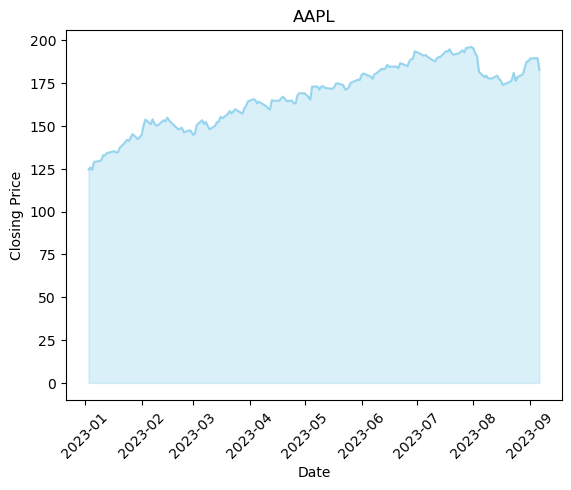

In [40]:
plt.fill_between(df2["Date"], df2["Close"], color="skyblue", alpha=0.3)
plt.plot(df2["Date"], df2["Close"], color="skyblue", alpha=0.8)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("AAPL")

#### Make a helper plotting function to generalise for any ticker

In [43]:
def price_plot(symbol):

    df = pd.DataFrame(data[symbol], columns=["Close"]).reset_index()
    plt.fill_between(df["Date"], df["Close"], color="skyblue", alpha=0.3)
    plt.plot(df["Date"], df["Close"], color="skyblue", alpha=0.8)
    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(symbol)
    return plt.show()

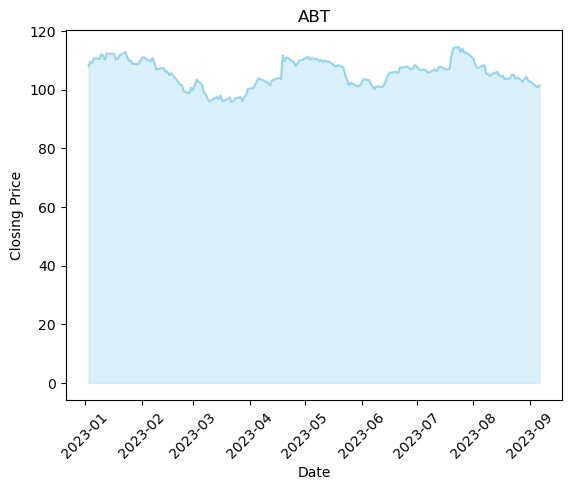

In [44]:
price_plot("ABT")

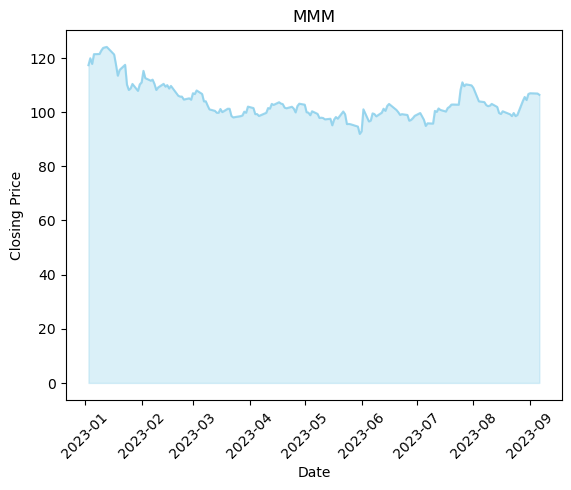

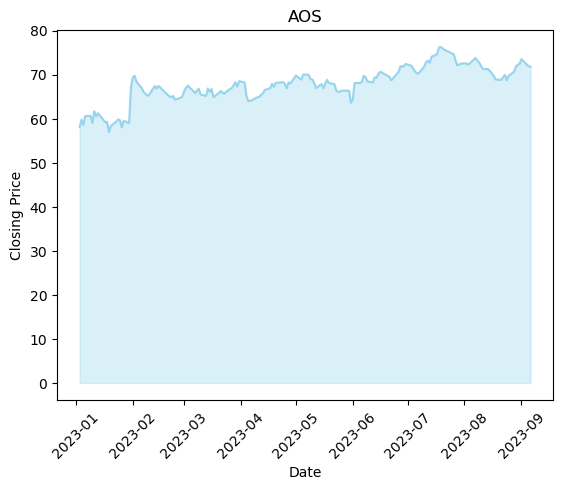

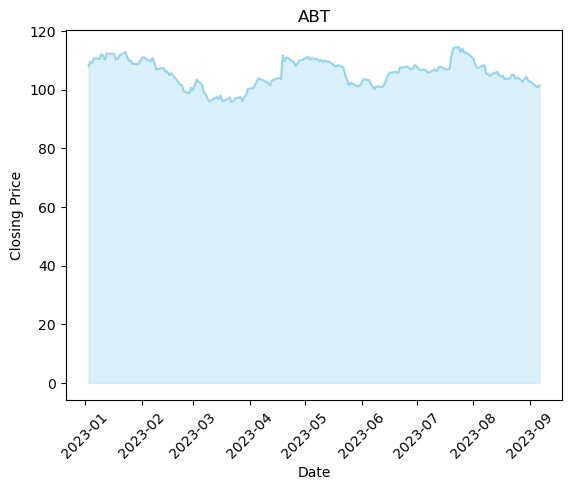

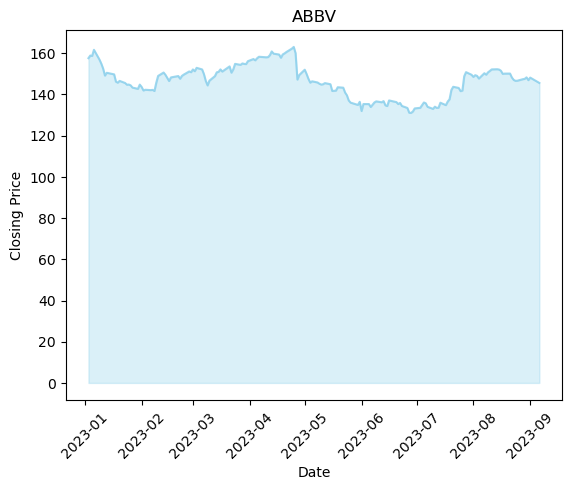

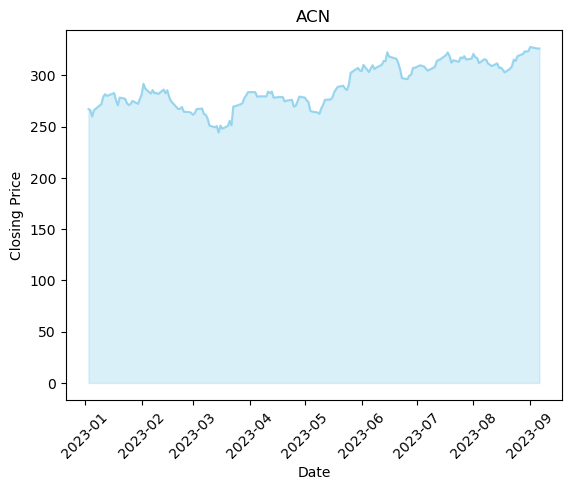

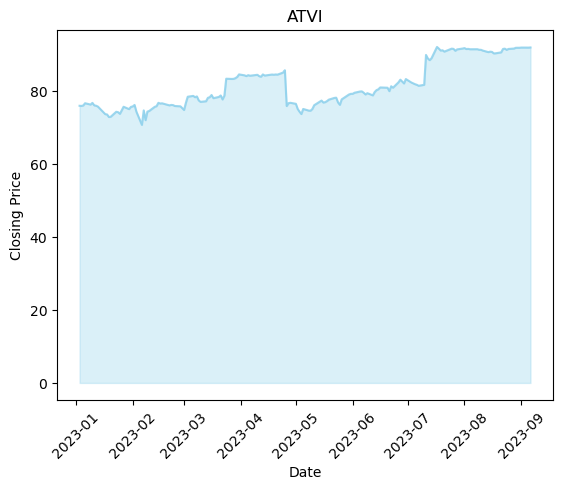

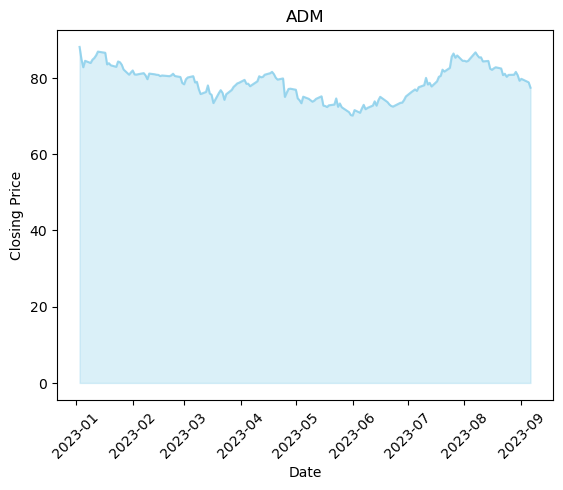

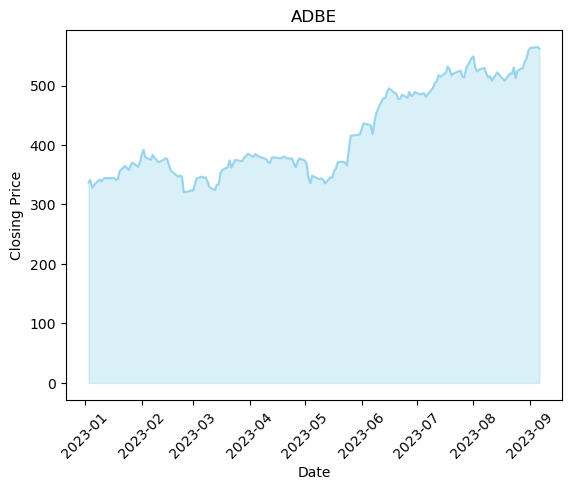

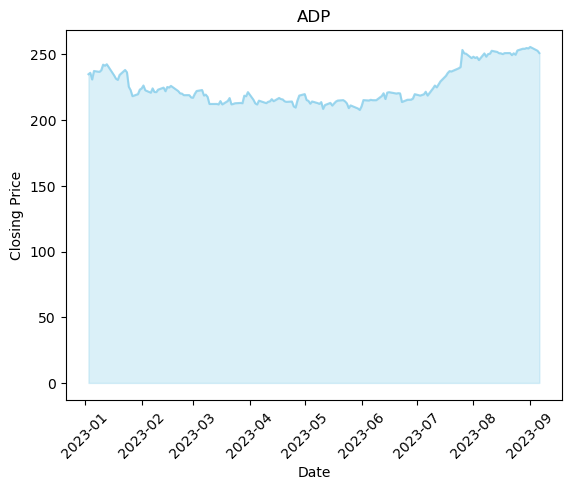

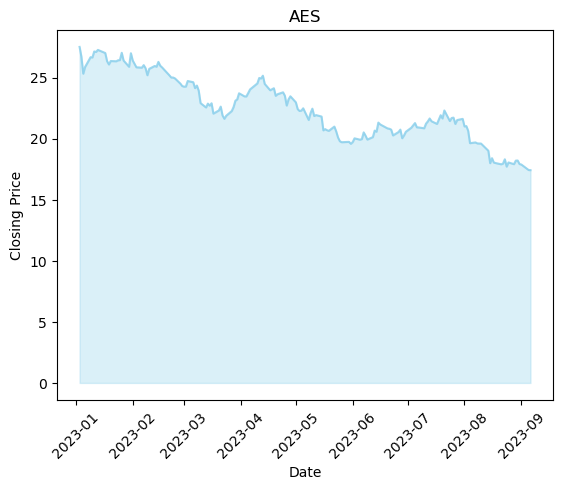

In [45]:
for ticker in list(df["Symbol"])[:10]:
    price_plot(ticker)